- **Package Import**

In [163]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import traceback

import re

%matplotlib inline

In [2]:
pd.options.display.max_colwidth = None

In [3]:
os.chdir('..')

- **Networks of Press members**

In [4]:
arr = np.array([9, 0, 3, 12, 7, 3, 0, 2, 5, 11, 3, 0, 1, 4, 12, 16, 1, 4, 21, 1, 13, 1, 3, 17, 3, 7, 1, 1, 9, 9, 7, 1, 1, 9, 9, 12, 1, 4, 17, 3, 7, 1, 2, 10, 8, 13, 1, 3, 17, 3, 15, 1, 3, 19, 2, 12, 0, 2, 14, 6])
arr = arr.reshape((12, 5))

In [6]:
counts = pd.DataFrame(arr, columns = ['total network counts', 
                                     'active member', 'network type counts', 
                                     'sum', 'rank'], 
                     index = ['HJ', 'MC', 'J', 'SM', 'ME', 'JR', 'SH', 'UM', 'OY', 
                             'EM', 'SY', 'DY'], 
                     )
counts['members'] = counts.index
counts = counts[['members'] + ['total network counts', 'network type counts', 'active member', 'sum', 'rank']]

In [9]:
counts

,members,total network counts,network type counts,active member,sum,rank
HJ,HJ,9,3,0,12,7
MC,MC,3,2,0,5,11
J,J,3,1,0,4,12
SM,SM,16,4,1,21,1
ME,ME,13,3,1,17,3
JR,JR,7,1,1,9,9
SH,SH,7,1,1,9,9
UM,UM,12,4,1,17,3
OY,OY,7,2,1,10,8
EM,EM,13,3,1,17,3


In [10]:
counts.sort_values(['rank'])

,members,total network counts,network type counts,active member,sum,rank
SM,SM,16,4,1,21,1
SY,SY,15,3,1,19,2
ME,ME,13,3,1,17,3
UM,UM,12,4,1,17,3
EM,EM,13,3,1,17,3
DY,DY,12,2,0,14,6
HJ,HJ,9,3,0,12,7
OY,OY,7,2,1,10,8
JR,JR,7,1,1,9,9
SH,SH,7,1,1,9,9


In [11]:
counts.drop(['members'], axis = 1).sort_values(['rank'])

,total network counts,network type counts,active member,sum,rank
SM,16,4,1,21,1
SY,15,3,1,19,2
ME,13,3,1,17,3
UM,12,4,1,17,3
EM,13,3,1,17,3
DY,12,2,0,14,6
HJ,9,3,0,12,7
OY,7,2,1,10,8
JR,7,1,1,9,9
SH,7,1,1,9,9


- networks rank divided by active membership 

C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

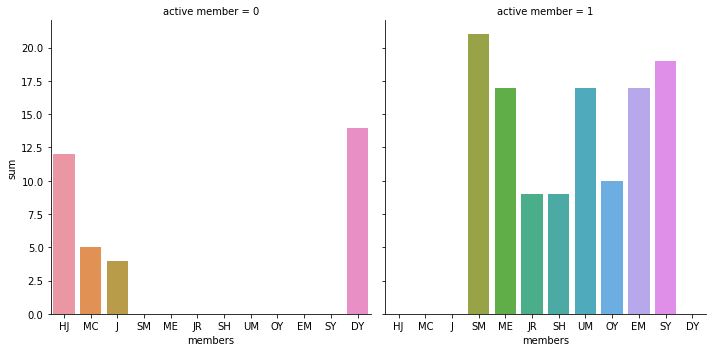

In [12]:
sns.catplot(x = 'members', y = 'sum', data = counts, 
           kind = 'bar', col = 'active member')

In [13]:
counts['active member'] = counts['active member'].astype(str)

In [14]:
pd.DataFrame(counts.groupby('active member')['total network counts'].mean())

,total network counts
active member,
0,6.75
1,11.25


In [15]:
pd.DataFrame(counts.groupby('active member')['rank'].mean())

,rank
active member,
0,9.00
1,4.75


- **Collecting and extracting data**

In [16]:
def read_file(filename): 
    
    text = open(os.getcwd() + '\\PDA\\Sociolinguistics\\' + filename, 
                encoding = 'utf8', 
                mode = 'r').read()
    text = re.sub('민철', 'MC', text)
    text = re.sub('배준', 'J', text)
    text = re.sub('🤘', 'JR', text)
    text = re.sub('정소연', 'OY', text)
    text = re.sub('해진', 'ME', text)
    text = re.sub('손숙영', 'SY', text)
    text = re.sub('세민', 'EM', text)
    text = re.sub('상민', 'SM', text)
    text = re.sub('JEONG YUNSEOK', 'YS', text)
    text = re.sub('수민', 'UM', text)
    text = re.sub('서현', 'SH', text)
    text = re.sub('ㄷ', 'DY', text)
    text = re.sub('.((오전)|(오후)) \S+', '', text)
    
    return text

def chats(text):
    import emoji
    chats = text.splitlines()[5:]
    chats = [chat.split(' ', 2) for chat in chats]
    chats = [emoji.replace_emoji(' '.join(chat), '').encode(encoding = 'euc-kr', 
                                                            errors = 'ignore').decode('euc-kr') for chat in chats]
    chats = [chat for chat in chats if re.match('\\[[A-Z]', chat)]

    return chats

def index_speakers(chats):
    #발화자별 딕셔너리 생성
    chats_speakers = collections.defaultdict(list)
    
    for chat in chats:
        try:
            chats_speakers[re.match('(\S+)?(.+)$', chat).groups()[0]] += [re.match('(\S+)?(.+)$', chat).groups()[1]]
        except:
            pass    
    
    return chats_speakers

In [17]:
index_speakers(chats(read_file(os.listdir('.\PDA\Sociolinguistics')[0])))

defaultdict(list,
            {'[MC]': ['  우선 사담방만 열어둘게요 ~ !',
              '  후후 사진 귀엽지 않나용',
              '  판김에 그냥 다 팠어요 ㅎㅎㅎ',
              '  사진',
              '  사진 필요하신 분 가지세용~',
              '  허허.. 이런 손재주는 없어서요',
              '  꼬문닷넷에서 가져왔어요',
              '  신기하네요 ㅋㅋㅋㅋㅋㅋㅋㅋ',
              '  사진',
              '  점점 카카오의 노예가 되어버리네요',
              '  아하 그럼 다른 성원분들 이야기를 들어보고 결절하는 것으로 해요',
              '  근데 준이 여덟시에 가야한다고.. 했던 것 같아서',
              '  흠.. 내부보고 같은 경우는 들으면서 해도 부담이 없다면 10분 정도만 늦추는 것고',
              '  방법이겠네요 !',
              '  전 찬성입니다 !',
              '  MC 서이(가) 예약된 Zoom 회의에 귀하를 초대합니다.',
              '  안그래도 만들긴 했는데',
              '  잘 만든게 맞나',
              '  싶네용..?',
              '  파일: 94체제 가을호 1차 통합문건.pdf',
              '  자..',
              '  어딩0 저장이',
              '  되어있을까',
              '  요',
              '  ㅋㅋㅋㅋㅋㅋㅋㅋ',
              '  흠.. 태블릿으로 진행을 해서 잠시만용',
              '  보통때라면 회의가 ㅈ끝나고 메일이 온다는데',
              '  지금 안온 상태라서요',
  

In [18]:
len(os.listdir('.\PDA\Sociolinguistics'))

4

In [19]:
def extract_speakers(chats_speakers):
    #발화 몇번?
    chats_info_speakers = pd.DataFrame({'speakers': chats_speakers.keys(), 
                          'counts': list(map(len, chats_speakers.values()))})      
    #how many 네?
    counts = []
    for key in chats_speakers.keys():
        counts.append
        
    chats_info_speakers['[Ne] counts'] = list(map(lambda x: len(re.findall('\\b(네|넵)[\S]*', ' '.join(chats_speakers[x]))), 
                                               chats_speakers.keys()))
    #what kind of 네?
    chats_info_speakers['[Ne] types'] = list(map(lambda x: re.findall('\\b[네|넵][\S]*', ' '.join(chats_speakers[x])), 
                                                                   chats_speakers.keys()))
    types = list(map(lambda x: re.findall('\\b[네|넵][\S]*', ' '.join(chats_speakers[x])), 
                                                                   chats_speakers.keys()))
    #total counts of 네 types 
    chats_info_speakers['[Ne] type counts'] = list(map(lambda x: len(pd.unique(x)), types))
    
    return chats_info_speakers

In [20]:
data_93 = pd.DataFrame(extract_speakers(index_speakers(chats(read_file(os.listdir('.\PDA\Sociolinguistics')[0])))))
data_94 = pd.DataFrame(extract_speakers(index_speakers(chats(read_file(os.listdir('.\PDA\Sociolinguistics')[1])))))
data_95 = pd.DataFrame(extract_speakers(index_speakers(chats(read_file(os.listdir('.\PDA\Sociolinguistics')[2]))))).iloc[0:6]
data_96 = pd.DataFrame(extract_speakers(index_speakers(chats(read_file(os.listdir('.\PDA\Sociolinguistics')[3])))))

C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_42212/1419585069.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  chats_info_speakers['[Ne] type counts'] = list(map(lambda x: len(pd.unique(x)), types))
C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_42212/1419585069.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  chats_info_speakers['[Ne] type counts'] = list(map(lambda x: len(pd.unique(x)), types))
C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_42212/1419585069.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  chats_info_speakers['[Ne] type counts'] = list(map(lambda x: len(pd.unique(x)), types))
C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_42212/1419585069.py:18:

In [21]:
data_93

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[MC],3583,126,"[네네, 넵, 넵넵, 넵넵, 네네, 넵, 넵~, 넵넵, 네, 넵, 넵, 넵, 네, 넵, 넵, 넵~, 넵, 네시가, 네, 넵넵, 네분이네요, 넵, 넵, 네네, 네, 넵!, 네엡~!, 넵, 넵, 네~~, 네, 네, 넵, 넵넵, 네엡, 네네, 네네, 넵넵, 네네, 네네, 넵넵!, 네네, 네, 넵넵, 넵넵, 네~~, 네네!, 네네, 네네~, 네네, 넵ㄴ베, 네네, 네네, 네네, 네네, 네, 네네, 넵, 네엡, 넵, 넵!, 넵, 넵넵!, 넵넵!, 네네, 네네, 넵, 네네, 네네, 네네, 네, 네트워크, 네네, 네네, 넵!, 네네!, 넵!, 네네, 네네, 네트워크, 넵, 넵, 네, 넵, 넵, 넵~~, 넵, 넵, 네트워크, 네트워크의, 넵넵, 네트워크, 네네, 네, 네트워크는, 네트워크, 네트워크, 네네, 네, 넵, ...]",23
1,[J],147,18,"[넵!, 넵!, 넵넵!, 넵, 넵!, 넵!, 넵, 넵!, 넵!, 넵, 넵넵!, 네넵, 넵!, 넵!, 넵~, 넵, 넵, 넵]",5
2,[ME],959,60,"[넵!!, 네네!, 넵!, 네!!!, 넵, 넵넵, 네트워크가, 네네!!!, 넵, 넵, 네넵, 네네!!, 네넵, 넵넵, 넵넵!, 네네!, 넵, 네, 넵, 네, 넵, 네, 네, 네넵, 네엡, 넵, 넵, 넵넵, 네네, 넵, 네엡...ㅜㅠㅠㅠ, 넵넵, 넵, 네네, 네넵, 네네, 넵, 넵!~~, 넵넵!~~, 넵!~~~, 넵!, 넵, 넵~~, 넵~~, 넵, 넵, 넵, 네네, 네넵~, 네!!, 넵넵, 넵, 넵~, 넵, 넵!~, 넵~, 넵, 넵, 넵!~, 넵]",23
3,[SM],2244,81,"[네네, 넵넵~, 네.감사해용!, 네, 네네, 네, 네네ㅎㅎ, 네네, 네~~, 넵ㅎㅎ, 네, 네번째는, 네개나, 네네, 네네, 네네, 네, 네, 네네, 네넹, 네네~, 네네, 네네, 넵넵~, 네네, 네네, 네, 네네, 네네, 네네, 네~, 네네, 네.., 네네, 네, 네네, 네~~, 네, 네, 네, 네네, 네네, 네네, 네, 네, 넵~!, 넵넵, 넵, 넵넵, 네시전엔, 넵, 넵넵, 넵넵ㅎㅎ, 네네, 네네, 네네, 네네, 넵넵, 네네, 넵ㅎㅎ, 네네, 네, 네네ㅎㅎ, 네네ㅎㅎ, 네, 네네, 네네~, 넵, 네네, 네~, 네네, 네네ㅋㅋㅋㅋ, 네네, 넵넵, 넵, 넵넵, 네네, 네, 네, 네, 네네]",19
4,[OY],1939,43,"[네...?, 네^____^, 네, 네, 네네, 네!, 네, 네가, 네, 네...ㅎ, 네, 네, 네!, 네~, 네, 네!, 네, 네, 네, 네, 네, 네, 네!, 네, 네네, 네, 네, 네!, 네, 네, 네, 네, 네?, 네, 네네, 네, 네, 네, 네, 네, 네, 네, 네]",9
5,[DY],504,43,"[네네, 네넵, 네, 네넵, 네, 넵, 네넵, 넵, 네넵, 넵, 넵넵, 넵, 넵, 넵넵, 넵넵, 넵, 넵, 네넵, 네넵, 넵, 네넵, 넵, 네넵, 네요, 네, 네네, 네넵, 네네, 넵, 네넵, 넵넵, 네넵, 네넵, 넵넵, 넵, 넵, 네넵, 넵, 네, 넵넵, 넵, 넵, 넵]",6


In [22]:
data_93.iloc[5, 3].index('네요')

23

- MC edit

In [23]:
for remove_index in [17, 19, 69, 76, 84, 84, 85, 87, 87, 87]:
    data_93.iloc[0, 3].pop(remove_index)
data_93.iloc[0, 2] = data_93['[Ne] counts'][0] - 10
data_93.iloc[0, 4] = data_93['[Ne] type counts'][0] - 5

- SM edit

In [24]:
for remove_index in [11, 11, 47]:
    data_93.iloc[3, 3].pop(remove_index)
data_93.iloc[3, 2] = data_93['[Ne] counts'][3] - 3
data_93.iloc[3, 4] = data_93['[Ne] type counts'][3] - 3

- ME edit

In [25]:
for remove_index in [6]:
    data_93.iloc[2, 3].pop(remove_index)
data_93.iloc[2, 2] = data_93['[Ne] counts'][2] - 1
data_93.iloc[2, 4] = data_93['[Ne] type counts'][2] - 1 

- DY edit

In [26]:
for remove_index in [23]:
    data_93.iloc[5, 3].pop(remove_index)
data_93.iloc[5, 2] = data_93['[Ne] counts'][5] - 1
data_93.iloc[5, 4] = data_93['[Ne] type counts'][5] - 1 

In [27]:
data_93

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[MC],3583,116,"[네네, 넵, 넵넵, 넵넵, 네네, 넵, 넵~, 넵넵, 네, 넵, 넵, 넵, 네, 넵, 넵, 넵~, 넵, 네, 넵넵, 넵, 넵, 네네, 네, 넵!, 네엡~!, 넵, 넵, 네~~, 네, 네, 넵, 넵넵, 네엡, 네네, 네네, 넵넵, 네네, 네네, 넵넵!, 네네, 네, 넵넵, 넵넵, 네~~, 네네!, 네네, 네네~, 네네, 넵ㄴ베, 네네, 네네, 네네, 네네, 네, 네네, 넵, 네엡, 넵, 넵!, 넵, 넵넵!, 넵넵!, 네네, 네네, 넵, 네네, 네네, 네네, 네, 네네, 네네, 넵!, 네네!, 넵!, 네네, 네네, 넵, 넵, 네, 넵, 넵, 넵~~, 넵, 넵, 넵넵, 네네, 네, 네네, 네, 넵, 네네, 넵~!, 넵넵, 넵!, 네네, 네넹, 넵!, 네, 넵, 네네, ...]",18
1,[J],147,18,"[넵!, 넵!, 넵넵!, 넵, 넵!, 넵!, 넵, 넵!, 넵!, 넵, 넵넵!, 네넵, 넵!, 넵!, 넵~, 넵, 넵, 넵]",5
2,[ME],959,59,"[넵!!, 네네!, 넵!, 네!!!, 넵, 넵넵, 네네!!!, 넵, 넵, 네넵, 네네!!, 네넵, 넵넵, 넵넵!, 네네!, 넵, 네, 넵, 네, 넵, 네, 네, 네넵, 네엡, 넵, 넵, 넵넵, 네네, 넵, 네엡...ㅜㅠㅠㅠ, 넵넵, 넵, 네네, 네넵, 네네, 넵, 넵!~~, 넵넵!~~, 넵!~~~, 넵!, 넵, 넵~~, 넵~~, 넵, 넵, 넵, 네네, 네넵~, 네!!, 넵넵, 넵, 넵~, 넵, 넵!~, 넵~, 넵, 넵, 넵!~, 넵]",22
3,[SM],2244,78,"[네네, 넵넵~, 네.감사해용!, 네, 네네, 네, 네네ㅎㅎ, 네네, 네~~, 넵ㅎㅎ, 네, 네네, 네네, 네네, 네, 네, 네네, 네넹, 네네~, 네네, 네네, 넵넵~, 네네, 네네, 네, 네네, 네네, 네네, 네~, 네네, 네.., 네네, 네, 네네, 네~~, 네, 네, 네, 네네, 네네, 네네, 네, 네, 넵~!, 넵넵, 넵, 넵넵, 넵, 넵넵, 넵넵ㅎㅎ, 네네, 네네, 네네, 네네, 넵넵, 네네, 넵ㅎㅎ, 네네, 네, 네네ㅎㅎ, 네네ㅎㅎ, 네, 네네, 네네~, 넵, 네네, 네~, 네네, 네네ㅋㅋㅋㅋ, 네네, 넵넵, 넵, 넵넵, 네네, 네, 네, 네, 네네]",16
4,[OY],1939,43,"[네...?, 네^____^, 네, 네, 네네, 네!, 네, 네가, 네, 네...ㅎ, 네, 네, 네!, 네~, 네, 네!, 네, 네, 네, 네, 네, 네, 네!, 네, 네네, 네, 네, 네!, 네, 네, 네, 네, 네?, 네, 네네, 네, 네, 네, 네, 네, 네, 네, 네]",9
5,[DY],504,42,"[네네, 네넵, 네, 네넵, 네, 넵, 네넵, 넵, 네넵, 넵, 넵넵, 넵, 넵, 넵넵, 넵넵, 넵, 넵, 네넵, 네넵, 넵, 네넵, 넵, 네넵, 네, 네네, 네넵, 네네, 넵, 네넵, 넵넵, 네넵, 네넵, 넵넵, 넵, 넵, 네넵, 넵, 네, 넵넵, 넵, 넵, 넵]",5


In [28]:
data_94

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[SM],3419,101,"[넵~, 넵넵ㅠㅠ, 넵넵!, 네네, 넵넵ㅎㅎ, 넵~, 네, 네네, 넵~, 네네, 넵넵, 네, 네네, 넵, 네네, 넵, 넵, 네, 네, 네네, 넵넵, 네네, 네, 넵넵ㅎㅋ, 넵, 네, 네, 네~, 네네, 네~, 네네, 네~, 네네!, 네트워크, 네네, 네트워크의, 네트워크, 네네, 네네~!, 네, 네네, 네, 넵, 네, 네갠, 넵, 넵넵~ㅠ, 네네, 네, 네, 넵, 넵넵~!ㅠ, 넵, 네네, 네이버..?, 네, 네네, 네네~, 네페이지도, 넵넵, 네, 네네, 넵, 네네, 네네, 넵, 넵넵~!, 네네~~!!, 네네!, 넵~ㅎㅎ, 네네~~~, 네네ㅎㅎ, 네, 네, 네, 네네, 네네, 네네, 네.., 네네~~~, 네, 네네, 네..., 네네, 네, 네네, 네네ㅋㅋㅋㅋ, 네네, 네네, 네, 넵, 네네, 네, 네네, 네.., 네네, 네네ㅠㅠ, 넵넵~, 네명이에요, 네, ...]",31
1,[ME],1065,41,"[넵, 넵!~, 넵넵, 네네!, 네엡, 넵넵, 네네!, 넵넵, 넵, 넵!~~, 넵, 넵, 네네, 네엡, 네이버, 넵, 네엡, 네, 네엡, 네엡, 네...저도, 넵, 넵, 넵넵, 넵, 네엡, 네트워크가, 넵, 넵, 네네, 네, 네넵, 네엡, 넵넵, 넵~, 넵넵!!, 네넹, 네시즘, 넵, 네네, 네]",16
2,[DY],261,8,"[네네, 넵, 네넹, 넵, 네, 넵, 네엡, 네넹]",5
3,[JR],1396,22,"[네네!, 네넵, 넵, 넵, 넵, 넵,,,, 네넹, 넵!!, 네…., 네네!, 네네!, 네네, 네네!!!!, 네네!, 네네!!!!!!!!!!!, 네거리에서, 네거리에서, 네네!, 네네!, 네네, 네네!, 네네!]",11
4,[OY],1190,21,"[네, 네, 네, 네, 네, 네~!, 네!!!, 네, 네, 네, 네, 네, 네, 네, 네..., 네, 네, 네, 네..., 네, 네]",4
5,[EM],2642,74,"[네!!, 넵넵!!, 넵넵!!, 네네, 넵.!!.!, 네네~!!, 네넹!!!, 네네, 네네!!, 네네!!, 네~!~!, 네네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ, 네네, 네네!!, 네네!!, 네네!!, 네네, 네네!!!, 네..요..., 네..!, 네엥~!~, 네이붜....메모...이걸로, 네네!!, 네네, 네네, 네네!!, 네네, 네네, 네에.~!!!, 네네!!!!!!!!!!!!!!!!, 네네!!!, 네네!!, 네넹.!..!, 네네!!, 네네, 네네^^, 네네~~>_<, 네네!!, 네네!!, 네넹!!!, 네네!!, 네네ㅠ, 네네, 네네, 네네!!, 네네!!!!, 네네!!!!, 네에!!!!!!!!!!!!, 네네, 네, 네네넨!.!, 네네..!, 네.....감사합니다...., 네네, 네넹, 네컷, 네컷으로, 네네, 네네.!.!, 네ㅎㅁㅎ, 네,,, 네네, 네네!!, 네네..ㅇㅁㅇ, 네네..~_~ㅇㅁㅇ, 네네, 네네, 네네, 네네, 네ㅔㄴ, 네에,,,, 네넵, 네네넨, 네]",38
6,[SY],1515,31,"[네....~~~~~!!!!!, 네, 네넵, 넵~~ㅜㅜ, 넵~, 네네!, 넵~, 네네..!, 네...., 넵...!!!, 네네~~, 넵~~, 네, 넵, 네~~~^^, 넵..~~~~, 넵...., 넵ㄴ~~, 네명자리에, 네, 넵.......ㅜ, 네,, 네,, 네에엥, 네넵~~~, 넵, 넵..., 네시까지, 넵~~~, 넵넵~~~!!, 네에엥~~~]",26
7,[SH],41,2,"[네!!, 넵]",2


In [29]:
data_94.iloc[6, 3].index('네시까지')

27

- SM edit

In [30]:
for remove_index in [33, 34, 34, 51, 54, 93]:
    data_94.iloc[0, 3].pop(remove_index)
data_94.iloc[0, 2] = data_94['[Ne] counts'][0] - 6
data_94.iloc[0, 4] = data_94['[Ne] type counts'][0] - 5

In [31]:
for remove_index in [41]:
    data_94.iloc[0, 3].pop(remove_index)
data_94.iloc[0, 2] = data_94['[Ne] counts'][0] - 1
data_94.iloc[0, 4] = data_94['[Ne] type counts'][0] - 1

- ME edit

In [32]:
for remove_index in [14, 25, 35]:
    data_94.iloc[1, 3].pop(remove_index)
data_94.iloc[1, 2] = data_94['[Ne] counts'][1] - 3
data_94.iloc[1, 4] = data_94['[Ne] type counts'][1] - 3

- JR edit

In [34]:
for remove_index in [15, 15]:
    data_94.iloc[3, 3].pop(remove_index)
data_94.iloc[3, 2] = data_94['[Ne] counts'][3] - 2
data_94.iloc[3, 4] = data_94['[Ne] type counts'][3] - 1

- EM edit

In [35]:
for remove_index in [21, 54, 54]:
    data_94.iloc[5, 3].pop(remove_index)
data_94.iloc[5, 2] = data_94['[Ne] counts'][5] - 3
data_94.iloc[5, 4] = data_94['[Ne] type counts'][5] - 3

In [36]:
for remove_index in [18]:
    data_94.iloc[5, 3].pop(remove_index)
data_94.iloc[5, 2] = data_94['[Ne] counts'][5] - 1
data_94.iloc[5, 4] = data_94['[Ne] type counts'][5] - 1

- SY edit

In [37]:
for remove_index in [18, 27]:
    data_94.iloc[6, 3].pop(remove_index)
data_94.iloc[6, 2] = data_94['[Ne] counts'][6] - 2
data_94.iloc[6, 4] = data_94['[Ne] type counts'][6] - 2

In [38]:
for remove_index in [26]:
    data_94.iloc[6, 3].pop(remove_index)
data_94.iloc[6, 2] = data_94['[Ne] counts'][6] - 1
data_94.iloc[6, 4] = data_94['[Ne] type counts'][6] - 1

In [39]:
data_94

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[SM],3419,94,"[넵~, 넵넵ㅠㅠ, 넵넵!, 네네, 넵넵ㅎㅎ, 넵~, 네, 네네, 넵~, 네네, 넵넵, 네, 네네, 넵, 네네, 넵, 넵, 네, 네, 네네, 넵넵, 네네, 네, 넵넵ㅎㅋ, 넵, 네, 네, 네~, 네네, 네~, 네네, 네~, 네네!, 네네, 네네, 네네~!, 네, 네네, 네, 넵, 네, 넵, 넵넵~ㅠ, 네네, 네, 네, 넵, 넵넵~!ㅠ, 넵, 네네, 네, 네네, 네네~, 넵넵, 네, 네네, 넵, 네네, 네네, 넵, 넵넵~!, 네네~~!!, 네네!, 넵~ㅎㅎ, 네네~~~, 네네ㅎㅎ, 네, 네, 네, 네네, 네네, 네네, 네.., 네네~~~, 네, 네네, 네..., 네네, 네, 네네, 네네ㅋㅋㅋㅋ, 네네, 네네, 네, 넵, 네네, 네, 네네, 네.., 네네, 네네ㅠㅠ, 넵넵~, 네, 네]",25
1,[ME],1065,38,"[넵, 넵!~, 넵넵, 네네!, 네엡, 넵넵, 네네!, 넵넵, 넵, 넵!~~, 넵, 넵, 네네, 네엡, 넵, 네엡, 네, 네엡, 네엡, 네...저도, 넵, 넵, 넵넵, 넵, 네엡, 넵, 넵, 네네, 네, 네넵, 네엡, 넵넵, 넵~, 넵넵!!, 네넹, 넵, 네네, 네]",13
2,[DY],261,8,"[네네, 넵, 네넹, 넵, 네, 넵, 네엡, 네넹]",5
3,[JR],1396,20,"[네네!, 네넵, 넵, 넵, 넵, 넵,,,, 네넹, 넵!!, 네…., 네네!, 네네!, 네네, 네네!!!!, 네네!, 네네!!!!!!!!!!!, 네네, 네네!, 네네!]",10
4,[OY],1190,21,"[네, 네, 네, 네, 네, 네~!, 네!!!, 네, 네, 네, 네, 네, 네, 네, 네..., 네, 네, 네, 네..., 네, 네]",4
5,[EM],2642,70,"[네!!, 넵넵!!, 넵넵!!, 네네, 넵.!!.!, 네네~!!, 네넹!!!, 네네, 네네!!, 네네!!, 네~!~!, 네네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ, 네네, 네네!!, 네네!!, 네네!!, 네네, 네네!!!, 네..!, 네엥~!~, 네네!!, 네네, 네네, 네네!!, 네네, 네네, 네에.~!!!, 네네!!!!!!!!!!!!!!!!, 네네!!!, 네네!!, 네넹.!..!, 네네!!, 네네, 네네^^, 네네~~>_<, 네네!!, 네네!!, 네넹!!!, 네네!!, 네네ㅠ, 네네, 네네, 네네!!, 네네!!!!, 네네!!!!, 네에!!!!!!!!!!!!, 네네, 네, 네네넨!.!, 네네..!, 네.....감사합니다...., 네네, 네넹, 네네, 네네.!.!, 네ㅎㅁㅎ, 네,,, 네네, 네네!!, 네네..ㅇㅁㅇ, 네네..~_~ㅇㅁㅇ, 네네, 네네, 네네, 네네, 네ㅔㄴ, 네에,,,, 네넵, 네네넨, 네]",34
6,[SY],1515,28,"[네....~~~~~!!!!!, 네, 네넵, 넵~~ㅜㅜ, 넵~, 네네!, 넵~, 네네..!, 네...., 넵...!!!, 네네~~, 넵~~, 네, 넵, 네~~~^^, 넵..~~~~, 넵...., 넵ㄴ~~, 네, 넵.......ㅜ, 네,, 네,, 네에엥, 네넵~~~, 넵, 넵..., 넵넵~~~!!, 네에엥~~~]",23
7,[SH],41,2,"[네!!, 넵]",2


In [40]:
data_95

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[OY],593,13,"[네, 네..., 네, 네, 네, 네, 네, 네, 네, 네!, 네, 네트워크, 네,,,]",5
1,[SY],413,21,"[네명이면...., 넵조아요, 넵......, 넵^^, 넵~~, 넵~~~, 넵, 네넹!, 넵..., 네넹................ㅜ, 네넹, 넵, 넵~~!!, 네에엥....ㅜㅜㅜ, 네넹....ㅜㅠ, 네엥....ㅜㅜ, 넵~~!!, 네에엥~~~, 네네넹, 네엥~~, 네네]",19
2,[ME],642,35,"[네에, 네에, 네엡, 네에, 네, 네, 네엥, 네네, 네에~, 네엡, 네엥, 네, 네엥~~, 네엠, 네에, 네네, 네에, 네네, 네넨, 네엥, 네, 네엠, 네넨, 네넨, 넵., 네넵~, 네네, 넵, 네넨, 네넨, 넵, 넵, 네넵ㅠ, 네, 네]",13
3,[EM],675,17,"[네넼ㅋㅋㅋㅋ, 네에ㅜㅠ, 네네, 네네!!, 네…ㅎ, 네네!!!, 네네ㅠㅠ!!, 네네ㅠㅠㅠ, 네네!!!, 네네, 네네, 네네..!, 네네!!, 네…, 네네!!, 네, 네네!!]",11
4,[SM],459,14,"[네네ㅠㅠ, 네, 네네, 네네, 네넹~, 네네, 네, 네, 네네ㅠ, 네, 네, 네네, 네엥, 네넹]",7
5,[UM],336,19,"[네엥, 네네, 네엥, 네내, 네…ㅠㅠㅠㅠ, 네네, 네넹, 네네, 네넺금, 네네, 네넹, 네네!, 네, 네넹!, 네네!!, 네시반, 네!, 네넹~, 네]",13


In [41]:
data_95['[Ne] types'][5]

['네엥',
 '네네',
 '네엥',
 '네내',
 '네…ㅠㅠㅠㅠ',
 '네네',
 '네넹',
 '네네',
 '네넺금',
 '네네',
 '네넹',
 '네네!',
 '네',
 '네넹!',
 '네네!!',
 '네시반',
 '네!',
 '네넹~',
 '네']

In [42]:
data_95['[Ne] types'][5].index('네시반')

15

- OY edit

In [43]:
for remove_index in [11]:
    data_95.iloc[0, 3].pop(remove_index)
data_95.iloc[0, 2] = data_95['[Ne] counts'][0] - 1
data_95.iloc[0, 4] = data_95['[Ne] type counts'][0] - 1

- SY edit

In [44]:
for remove_index in [0]:
    data_95.iloc[1, 3].pop(remove_index)
data_95.iloc[1, 2] = data_95['[Ne] counts'][1] - 1
data_95.iloc[1, 4] = data_95['[Ne] type counts'][1] - 1

- UM edit

In [45]:
for remove_index in [15]:
    data_95.iloc[5, 3].pop(remove_index)
data_95.iloc[5, 2] = data_95['[Ne] counts'][5] - 1
data_95.iloc[5, 4] = data_95['[Ne] type counts'][5] - 1

In [46]:
data_95

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[OY],593,12,"[네, 네..., 네, 네, 네, 네, 네, 네, 네, 네!, 네, 네,,,]",4
1,[SY],413,20,"[넵조아요, 넵......, 넵^^, 넵~~, 넵~~~, 넵, 네넹!, 넵..., 네넹................ㅜ, 네넹, 넵, 넵~~!!, 네에엥....ㅜㅜㅜ, 네넹....ㅜㅠ, 네엥....ㅜㅜ, 넵~~!!, 네에엥~~~, 네네넹, 네엥~~, 네네]",18
2,[ME],642,35,"[네에, 네에, 네엡, 네에, 네, 네, 네엥, 네네, 네에~, 네엡, 네엥, 네, 네엥~~, 네엠, 네에, 네네, 네에, 네네, 네넨, 네엥, 네, 네엠, 네넨, 네넨, 넵., 네넵~, 네네, 넵, 네넨, 네넨, 넵, 넵, 네넵ㅠ, 네, 네]",13
3,[EM],675,17,"[네넼ㅋㅋㅋㅋ, 네에ㅜㅠ, 네네, 네네!!, 네…ㅎ, 네네!!!, 네네ㅠㅠ!!, 네네ㅠㅠㅠ, 네네!!!, 네네, 네네, 네네..!, 네네!!, 네…, 네네!!, 네, 네네!!]",11
4,[SM],459,14,"[네네ㅠㅠ, 네, 네네, 네네, 네넹~, 네네, 네, 네, 네네ㅠ, 네, 네, 네네, 네엥, 네넹]",7
5,[UM],336,18,"[네엥, 네네, 네엥, 네내, 네…ㅠㅠㅠㅠ, 네네, 네넹, 네네, 네넺금, 네네, 네넹, 네네!, 네, 네넹!, 네네!!, 네!, 네넹~, 네]",12


In [47]:
data_96

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[ME],934,47,"[네엥, 네, 네넹, 네, 네, 네엥~, 네넨, 네, 네넨, 네네!!!, 네엥~~, 네넨!, 네넨, 네엥~, 네엡~, 네네!, 네넨!, 네, 넵, 네네, 네넨!, 넵, 네엡, 네넨!, 네넹, 네엥~, 넵~, 넵, 네엥, 네엡, 네!!, 넵!~, 네이버, 네!, 네, 넵, 넵, 네엔, 넵, 네네, 넵, 넵, 네네, 넵, 네넹, 네마자요~~, 네에~~~]",21
1,[SY],359,19,"[넵, 네넹~~~~~~, 네네넵, 네넹~~~!!, 네넹알겟습네당, 네에엥..., 네넹, 네넹!, 넵~~~, 네넹, 네넹!, 네엡~, 넵, 네넹!!, 네네넹, 네엥..., 네넵!, 네넹~~~~!!!, 네넹잘보여요!]",16
2,[UM],153,17,"[네네, 네네~!!, 네넹, 네조아용!, 네네!, 네네, 네시쯤, 네~!, 네네, 넵, 네~!!!, 네!!ㅎㅎ, 네네!, 네넹, 네네, 네넵!, 네]",12
3,[EM],364,16,"[네네.!.!, 네네.!!, 네네!!, 네..., 네네..., 네네!!, 네네!!!, 네네!!!, 네네.~!!!, 네네!!, 네네~!!, 네네!!!ㅎㅎ, 네네,,,!, 네네.!!!!, 네네!!!!, 네네]",13
4,[SH],11,0,[],0
5,[YS],269,3,"[넵넵, 네네, 네네]",2


In [48]:
data_96['[Ne] types'][2].index('네시쯤')

6

- ME edit

In [49]:
for remove_index in [32]:
    data_96.iloc[0, 3].pop(remove_index)
data_96.iloc[0, 2] = data_96['[Ne] counts'][0] - 1
data_96.iloc[0, 4] = data_96['[Ne] type counts'][0] - 1

- UM edit

In [50]:
for remove_index in [6]:
    data_96.iloc[2, 3].pop(remove_index)
data_96.iloc[2, 2] = data_96['[Ne] counts'][2] - 1
data_96.iloc[2, 4] = data_96['[Ne] type counts'][2] - 1

In [51]:
data_96

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts
0,[ME],934,46,"[네엥, 네, 네넹, 네, 네, 네엥~, 네넨, 네, 네넨, 네네!!!, 네엥~~, 네넨!, 네넨, 네엥~, 네엡~, 네네!, 네넨!, 네, 넵, 네네, 네넨!, 넵, 네엡, 네넨!, 네넹, 네엥~, 넵~, 넵, 네엥, 네엡, 네!!, 넵!~, 네!, 네, 넵, 넵, 네엔, 넵, 네네, 넵, 넵, 네네, 넵, 네넹, 네마자요~~, 네에~~~]",20
1,[SY],359,19,"[넵, 네넹~~~~~~, 네네넵, 네넹~~~!!, 네넹알겟습네당, 네에엥..., 네넹, 네넹!, 넵~~~, 네넹, 네넹!, 네엡~, 넵, 네넹!!, 네네넹, 네엥..., 네넵!, 네넹~~~~!!!, 네넹잘보여요!]",16
2,[UM],153,16,"[네네, 네네~!!, 네넹, 네조아용!, 네네!, 네네, 네~!, 네네, 넵, 네~!!!, 네!!ㅎㅎ, 네네!, 네넹, 네네, 네넵!, 네]",11
3,[EM],364,16,"[네네.!.!, 네네.!!, 네네!!, 네..., 네네..., 네네!!, 네네!!!, 네네!!!, 네네.~!!!, 네네!!, 네네~!!, 네네!!!ㅎㅎ, 네네,,,!, 네네.!!!!, 네네!!!!, 네네]",13
4,[SH],11,0,[],0
5,[YS],269,3,"[넵넵, 네네, 네네]",2


-------------------------------------------------------------------------------------------------------

- **Calculate informal 네 ratio**

In [52]:
data_93['[Ne] types'][5]

['네네',
 '네넵',
 '네',
 '네넵',
 '네',
 '넵',
 '네넵',
 '넵',
 '네넵',
 '넵',
 '넵넵',
 '넵',
 '넵',
 '넵넵',
 '넵넵',
 '넵',
 '넵',
 '네넵',
 '네넵',
 '넵',
 '네넵',
 '넵',
 '네넵',
 '네',
 '네네',
 '네넵',
 '네네',
 '넵',
 '네넵',
 '넵넵',
 '네넵',
 '네넵',
 '넵넵',
 '넵',
 '넵',
 '네넵',
 '넵',
 '네',
 '넵넵',
 '넵',
 '넵',
 '넵']

In [53]:
data_93['informal [Ne] counts'] = [10, 0, 7, 2, 0, 0]
data_93['informal [Ne] ratio'] = data_93['informal [Ne] counts'] / data_93['[Ne] counts']

In [54]:
data_94['[Ne] types'][7]

['네!!', '넵']

In [55]:
data_94['informal [Ne] counts'] = [3, 9, 3, 3, 1, 25, 15, 0]
data_94['informal [Ne] ratio'] = data_94['informal [Ne] counts'] / data_94['[Ne] counts']

In [56]:
data_95['[Ne] types'][5]

['네엥',
 '네네',
 '네엥',
 '네내',
 '네…ㅠㅠㅠㅠ',
 '네네',
 '네넹',
 '네네',
 '네넺금',
 '네네',
 '네넹',
 '네네!',
 '네',
 '네넹!',
 '네네!!',
 '네!',
 '네넹~',
 '네']

In [57]:
data_95['informal [Ne] counts'] = [0, 14, 14, 4, 3, 7]
data_95['informal [Ne] ratio'] = data_95['informal [Ne] counts'] / data_95['[Ne] counts']

In [58]:
data_96['[Ne] types'][5]

['넵넵', '네네', '네네']

In [59]:
data_96['informal [Ne] counts'] = [23, 15, 2, 7, 0, 0]
data_96['informal [Ne] ratio'] = data_96['informal [Ne] counts'] / data_96['[Ne] counts']

In [60]:
for data in [data_93, data_94, data_95, data_96]:
    data['informal [Ne] ratio'] = round((data['informal [Ne] counts'] / data['[Ne] counts']) * 100, 2)

In [61]:
data_93

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[MC],3583,116,"[네네, 넵, 넵넵, 넵넵, 네네, 넵, 넵~, 넵넵, 네, 넵, 넵, 넵, 네, 넵, 넵, 넵~, 넵, 네, 넵넵, 넵, 넵, 네네, 네, 넵!, 네엡~!, 넵, 넵, 네~~, 네, 네, 넵, 넵넵, 네엡, 네네, 네네, 넵넵, 네네, 네네, 넵넵!, 네네, 네, 넵넵, 넵넵, 네~~, 네네!, 네네, 네네~, 네네, 넵ㄴ베, 네네, 네네, 네네, 네네, 네, 네네, 넵, 네엡, 넵, 넵!, 넵, 넵넵!, 넵넵!, 네네, 네네, 넵, 네네, 네네, 네네, 네, 네네, 네네, 넵!, 네네!, 넵!, 네네, 네네, 넵, 넵, 네, 넵, 넵, 넵~~, 넵, 넵, 넵넵, 네네, 네, 네네, 네, 넵, 네네, 넵~!, 넵넵, 넵!, 네네, 네넹, 넵!, 네, 넵, 네네, ...]",18,10,8.62
1,[J],147,18,"[넵!, 넵!, 넵넵!, 넵, 넵!, 넵!, 넵, 넵!, 넵!, 넵, 넵넵!, 네넵, 넵!, 넵!, 넵~, 넵, 넵, 넵]",5,0,0.00
2,[ME],959,59,"[넵!!, 네네!, 넵!, 네!!!, 넵, 넵넵, 네네!!!, 넵, 넵, 네넵, 네네!!, 네넵, 넵넵, 넵넵!, 네네!, 넵, 네, 넵, 네, 넵, 네, 네, 네넵, 네엡, 넵, 넵, 넵넵, 네네, 넵, 네엡...ㅜㅠㅠㅠ, 넵넵, 넵, 네네, 네넵, 네네, 넵, 넵!~~, 넵넵!~~, 넵!~~~, 넵!, 넵, 넵~~, 넵~~, 넵, 넵, 넵, 네네, 네넵~, 네!!, 넵넵, 넵, 넵~, 넵, 넵!~, 넵~, 넵, 넵, 넵!~, 넵]",22,7,11.86
3,[SM],2244,78,"[네네, 넵넵~, 네.감사해용!, 네, 네네, 네, 네네ㅎㅎ, 네네, 네~~, 넵ㅎㅎ, 네, 네네, 네네, 네네, 네, 네, 네네, 네넹, 네네~, 네네, 네네, 넵넵~, 네네, 네네, 네, 네네, 네네, 네네, 네~, 네네, 네.., 네네, 네, 네네, 네~~, 네, 네, 네, 네네, 네네, 네네, 네, 네, 넵~!, 넵넵, 넵, 넵넵, 넵, 넵넵, 넵넵ㅎㅎ, 네네, 네네, 네네, 네네, 넵넵, 네네, 넵ㅎㅎ, 네네, 네, 네네ㅎㅎ, 네네ㅎㅎ, 네, 네네, 네네~, 넵, 네네, 네~, 네네, 네네ㅋㅋㅋㅋ, 네네, 넵넵, 넵, 넵넵, 네네, 네, 네, 네, 네네]",16,2,2.56
4,[OY],1939,43,"[네...?, 네^____^, 네, 네, 네네, 네!, 네, 네가, 네, 네...ㅎ, 네, 네, 네!, 네~, 네, 네!, 네, 네, 네, 네, 네, 네, 네!, 네, 네네, 네, 네, 네!, 네, 네, 네, 네, 네?, 네, 네네, 네, 네, 네, 네, 네, 네, 네, 네]",9,0,0.00
5,[DY],504,42,"[네네, 네넵, 네, 네넵, 네, 넵, 네넵, 넵, 네넵, 넵, 넵넵, 넵, 넵, 넵넵, 넵넵, 넵, 넵, 네넵, 네넵, 넵, 네넵, 넵, 네넵, 네, 네네, 네넵, 네네, 넵, 네넵, 넵넵, 네넵, 네넵, 넵넵, 넵, 넵, 네넵, 넵, 네, 넵넵, 넵, 넵, 넵]",5,0,0.00


In [62]:
data_94

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[SM],3419,94,"[넵~, 넵넵ㅠㅠ, 넵넵!, 네네, 넵넵ㅎㅎ, 넵~, 네, 네네, 넵~, 네네, 넵넵, 네, 네네, 넵, 네네, 넵, 넵, 네, 네, 네네, 넵넵, 네네, 네, 넵넵ㅎㅋ, 넵, 네, 네, 네~, 네네, 네~, 네네, 네~, 네네!, 네네, 네네, 네네~!, 네, 네네, 네, 넵, 네, 넵, 넵넵~ㅠ, 네네, 네, 네, 넵, 넵넵~!ㅠ, 넵, 네네, 네, 네네, 네네~, 넵넵, 네, 네네, 넵, 네네, 네네, 넵, 넵넵~!, 네네~~!!, 네네!, 넵~ㅎㅎ, 네네~~~, 네네ㅎㅎ, 네, 네, 네, 네네, 네네, 네네, 네.., 네네~~~, 네, 네네, 네..., 네네, 네, 네네, 네네ㅋㅋㅋㅋ, 네네, 네네, 네, 넵, 네네, 네, 네네, 네.., 네네, 네네ㅠㅠ, 넵넵~, 네, 네]",25,3,3.19
1,[ME],1065,38,"[넵, 넵!~, 넵넵, 네네!, 네엡, 넵넵, 네네!, 넵넵, 넵, 넵!~~, 넵, 넵, 네네, 네엡, 넵, 네엡, 네, 네엡, 네엡, 네...저도, 넵, 넵, 넵넵, 넵, 네엡, 넵, 넵, 네네, 네, 네넵, 네엡, 넵넵, 넵~, 넵넵!!, 네넹, 넵, 네네, 네]",13,9,23.68
2,[DY],261,8,"[네네, 넵, 네넹, 넵, 네, 넵, 네엡, 네넹]",5,3,37.50
3,[JR],1396,20,"[네네!, 네넵, 넵, 넵, 넵, 넵,,,, 네넹, 넵!!, 네…., 네네!, 네네!, 네네, 네네!!!!, 네네!, 네네!!!!!!!!!!!, 네네, 네네!, 네네!]",10,3,15.00
4,[OY],1190,21,"[네, 네, 네, 네, 네, 네~!, 네!!!, 네, 네, 네, 네, 네, 네, 네, 네..., 네, 네, 네, 네..., 네, 네]",4,1,4.76
5,[EM],2642,70,"[네!!, 넵넵!!, 넵넵!!, 네네, 넵.!!.!, 네네~!!, 네넹!!!, 네네, 네네!!, 네네!!, 네~!~!, 네네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ, 네네, 네네!!, 네네!!, 네네!!, 네네, 네네!!!, 네..!, 네엥~!~, 네네!!, 네네, 네네, 네네!!, 네네, 네네, 네에.~!!!, 네네!!!!!!!!!!!!!!!!, 네네!!!, 네네!!, 네넹.!..!, 네네!!, 네네, 네네^^, 네네~~>_<, 네네!!, 네네!!, 네넹!!!, 네네!!, 네네ㅠ, 네네, 네네, 네네!!, 네네!!!!, 네네!!!!, 네에!!!!!!!!!!!!, 네네, 네, 네네넨!.!, 네네..!, 네.....감사합니다...., 네네, 네넹, 네네, 네네.!.!, 네ㅎㅁㅎ, 네,,, 네네, 네네!!, 네네..ㅇㅁㅇ, 네네..~_~ㅇㅁㅇ, 네네, 네네, 네네, 네네, 네ㅔㄴ, 네에,,,, 네넵, 네네넨, 네]",34,25,35.71
6,[SY],1515,28,"[네....~~~~~!!!!!, 네, 네넵, 넵~~ㅜㅜ, 넵~, 네네!, 넵~, 네네..!, 네...., 넵...!!!, 네네~~, 넵~~, 네, 넵, 네~~~^^, 넵..~~~~, 넵...., 넵ㄴ~~, 네, 넵.......ㅜ, 네,, 네,, 네에엥, 네넵~~~, 넵, 넵..., 넵넵~~~!!, 네에엥~~~]",23,15,53.57
7,[SH],41,2,"[네!!, 넵]",2,0,0.00


In [63]:
data_95

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[OY],593,12,"[네, 네..., 네, 네, 네, 네, 네, 네, 네, 네!, 네, 네,,,]",4,0,0.00
1,[SY],413,20,"[넵조아요, 넵......, 넵^^, 넵~~, 넵~~~, 넵, 네넹!, 넵..., 네넹................ㅜ, 네넹, 넵, 넵~~!!, 네에엥....ㅜㅜㅜ, 네넹....ㅜㅠ, 네엥....ㅜㅜ, 넵~~!!, 네에엥~~~, 네네넹, 네엥~~, 네네]",18,14,70.00
2,[ME],642,35,"[네에, 네에, 네엡, 네에, 네, 네, 네엥, 네네, 네에~, 네엡, 네엥, 네, 네엥~~, 네엠, 네에, 네네, 네에, 네네, 네넨, 네엥, 네, 네엠, 네넨, 네넨, 넵., 네넵~, 네네, 넵, 네넨, 네넨, 넵, 넵, 네넵ㅠ, 네, 네]",13,14,40.00
3,[EM],675,17,"[네넼ㅋㅋㅋㅋ, 네에ㅜㅠ, 네네, 네네!!, 네…ㅎ, 네네!!!, 네네ㅠㅠ!!, 네네ㅠㅠㅠ, 네네!!!, 네네, 네네, 네네..!, 네네!!, 네…, 네네!!, 네, 네네!!]",11,4,23.53
4,[SM],459,14,"[네네ㅠㅠ, 네, 네네, 네네, 네넹~, 네네, 네, 네, 네네ㅠ, 네, 네, 네네, 네엥, 네넹]",7,3,21.43
5,[UM],336,18,"[네엥, 네네, 네엥, 네내, 네…ㅠㅠㅠㅠ, 네네, 네넹, 네네, 네넺금, 네네, 네넹, 네네!, 네, 네넹!, 네네!!, 네!, 네넹~, 네]",12,7,38.89


In [64]:
data_96

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[ME],934,46,"[네엥, 네, 네넹, 네, 네, 네엥~, 네넨, 네, 네넨, 네네!!!, 네엥~~, 네넨!, 네넨, 네엥~, 네엡~, 네네!, 네넨!, 네, 넵, 네네, 네넨!, 넵, 네엡, 네넨!, 네넹, 네엥~, 넵~, 넵, 네엥, 네엡, 네!!, 넵!~, 네!, 네, 넵, 넵, 네엔, 넵, 네네, 넵, 넵, 네네, 넵, 네넹, 네마자요~~, 네에~~~]",20,23,50.00
1,[SY],359,19,"[넵, 네넹~~~~~~, 네네넵, 네넹~~~!!, 네넹알겟습네당, 네에엥..., 네넹, 네넹!, 넵~~~, 네넹, 네넹!, 네엡~, 넵, 네넹!!, 네네넹, 네엥..., 네넵!, 네넹~~~~!!!, 네넹잘보여요!]",16,15,78.95
2,[UM],153,16,"[네네, 네네~!!, 네넹, 네조아용!, 네네!, 네네, 네~!, 네네, 넵, 네~!!!, 네!!ㅎㅎ, 네네!, 네넹, 네네, 네넵!, 네]",11,2,12.50
3,[EM],364,16,"[네네.!.!, 네네.!!, 네네!!, 네..., 네네..., 네네!!, 네네!!!, 네네!!!, 네네.~!!!, 네네!!, 네네~!!, 네네!!!ㅎㅎ, 네네,,,!, 네네.!!!!, 네네!!!!, 네네]",13,7,43.75
4,[SH],11,0,[],0,0,NaN
5,[YS],269,3,"[넵넵, 네네, 네네]",2,0,0.00


C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

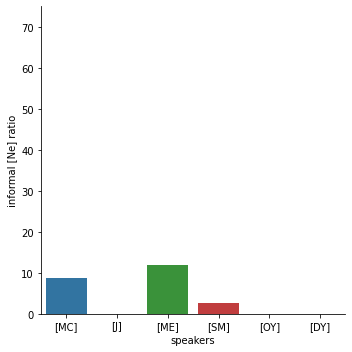

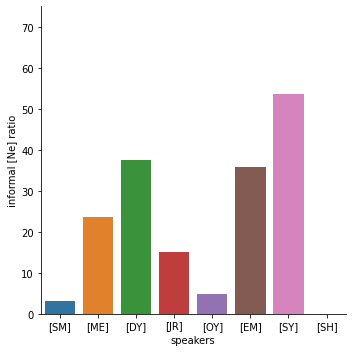

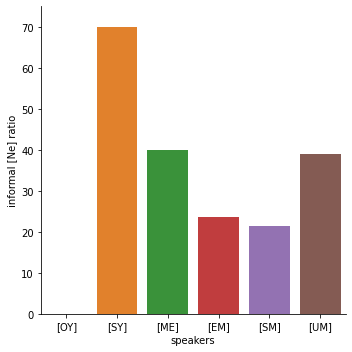

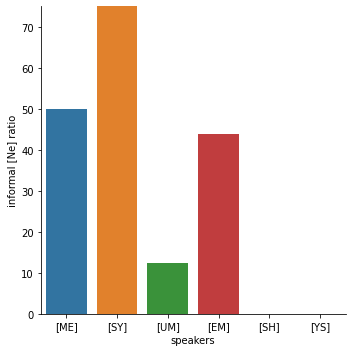

In [65]:
for data in [data_93, data_94, data_95, data_96]:
    g = sns.catplot(x = 'speakers', y = 'informal [Ne] ratio', 
           data = data, kind = 'bar').set(ylim = (0, 75))
    g.set_titles(f'[{data}] informal [Ne] ratio')

C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaron Cho\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

[(0.0, 80.0), Text(0.5, 1.0, 'data_96 informal [NE] ratio')]

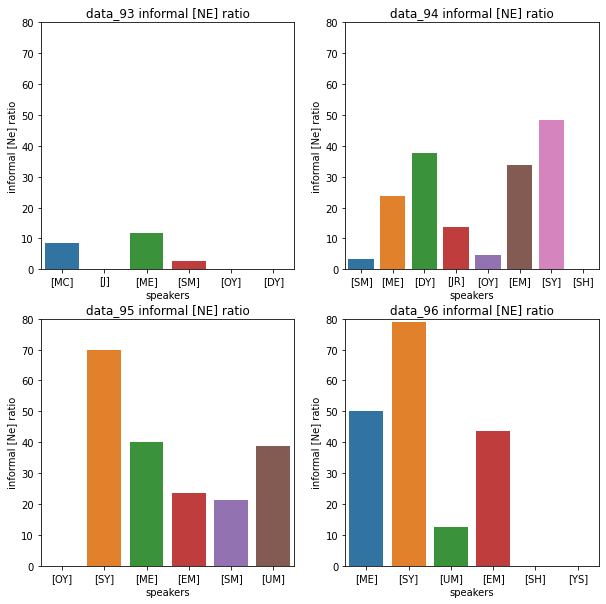

In [56]:
plt.rcParams['figure.figsize'] = (10, 10)
fig, axes = plt.subplots(2, 2)

sns.barplot(x = 'speakers', y = 'informal [Ne] ratio', 
           data = data_93, ax = axes[0, 0]).set(ylim = (0, 80), title = 'data_93 informal [NE] ratio')
sns.barplot(x = 'speakers', y = 'informal [Ne] ratio', 
           data = data_94, ax = axes[0, 1]).set(ylim = (0, 80), title = 'data_94 informal [NE] ratio')
sns.barplot(x = 'speakers', y = 'informal [Ne] ratio', 
           data = data_95, ax = axes[1, 0]).set(ylim = (0, 80), title = 'data_95 informal [NE] ratio')
sns.barplot(x = 'speakers', y = 'informal [Ne] ratio', 
           data = data_96, ax = axes[1, 1]).set(ylim = (0, 80), title = 'data_96 informal [NE] ratio')


In [68]:
data_93

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[MC],3583,116,"[네네, 넵, 넵넵, 넵넵, 네네, 넵, 넵~, 넵넵, 네, 넵, 넵, 넵, 네, 넵, 넵, 넵~, 넵, 네, 넵넵, 넵, 넵, 네네, 네, 넵!, 네엡~!, 넵, 넵, 네~~, 네, 네, 넵, 넵넵, 네엡, 네네, 네네, 넵넵, 네네, 네네, 넵넵!, 네네, 네, 넵넵, 넵넵, 네~~, 네네!, 네네, 네네~, 네네, 넵ㄴ베, 네네, 네네, 네네, 네네, 네, 네네, 넵, 네엡, 넵, 넵!, 넵, 넵넵!, 넵넵!, 네네, 네네, 넵, 네네, 네네, 네네, 네, 네네, 네네, 넵!, 네네!, 넵!, 네네, 네네, 넵, 넵, 네, 넵, 넵, 넵~~, 넵, 넵, 넵넵, 네네, 네, 네네, 네, 넵, 네네, 넵~!, 넵넵, 넵!, 네네, 네넹, 넵!, 네, 넵, 네네, ...]",18,10,8.62
1,[J],147,18,"[넵!, 넵!, 넵넵!, 넵, 넵!, 넵!, 넵, 넵!, 넵!, 넵, 넵넵!, 네넵, 넵!, 넵!, 넵~, 넵, 넵, 넵]",5,0,0.00
2,[ME],959,59,"[넵!!, 네네!, 넵!, 네!!!, 넵, 넵넵, 네네!!!, 넵, 넵, 네넵, 네네!!, 네넵, 넵넵, 넵넵!, 네네!, 넵, 네, 넵, 네, 넵, 네, 네, 네넵, 네엡, 넵, 넵, 넵넵, 네네, 넵, 네엡...ㅜㅠㅠㅠ, 넵넵, 넵, 네네, 네넵, 네네, 넵, 넵!~~, 넵넵!~~, 넵!~~~, 넵!, 넵, 넵~~, 넵~~, 넵, 넵, 넵, 네네, 네넵~, 네!!, 넵넵, 넵, 넵~, 넵, 넵!~, 넵~, 넵, 넵, 넵!~, 넵]",22,7,11.86
3,[SM],2244,78,"[네네, 넵넵~, 네.감사해용!, 네, 네네, 네, 네네ㅎㅎ, 네네, 네~~, 넵ㅎㅎ, 네, 네네, 네네, 네네, 네, 네, 네네, 네넹, 네네~, 네네, 네네, 넵넵~, 네네, 네네, 네, 네네, 네네, 네네, 네~, 네네, 네.., 네네, 네, 네네, 네~~, 네, 네, 네, 네네, 네네, 네네, 네, 네, 넵~!, 넵넵, 넵, 넵넵, 넵, 넵넵, 넵넵ㅎㅎ, 네네, 네네, 네네, 네네, 넵넵, 네네, 넵ㅎㅎ, 네네, 네, 네네ㅎㅎ, 네네ㅎㅎ, 네, 네네, 네네~, 넵, 네네, 네~, 네네, 네네ㅋㅋㅋㅋ, 네네, 넵넵, 넵, 넵넵, 네네, 네, 네, 네, 네네]",16,2,2.56
4,[OY],1939,43,"[네...?, 네^____^, 네, 네, 네네, 네!, 네, 네가, 네, 네...ㅎ, 네, 네, 네!, 네~, 네, 네!, 네, 네, 네, 네, 네, 네, 네!, 네, 네네, 네, 네, 네!, 네, 네, 네, 네, 네?, 네, 네네, 네, 네, 네, 네, 네, 네, 네, 네]",9,0,0.00
5,[DY],504,42,"[네네, 네넵, 네, 네넵, 네, 넵, 네넵, 넵, 네넵, 넵, 넵넵, 넵, 넵, 넵넵, 넵넵, 넵, 넵, 네넵, 네넵, 넵, 네넵, 넵, 네넵, 네, 네네, 네넵, 네네, 넵, 네넵, 넵넵, 네넵, 네넵, 넵넵, 넵, 넵, 네넵, 넵, 네, 넵넵, 넵, 넵, 넵]",5,0,0.00


In [169]:
data_94

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[SM],3419,94,"[넵~, 넵넵ㅠㅠ, 넵넵!, 네네, 넵넵ㅎㅎ, 넵~, 네, 네네, 넵~, 네네, 넵넵, 네, 네네, 넵, 네네, 넵, 넵, 네, 네, 네네, 넵넵, 네네, 네, 넵넵ㅎㅋ, 넵, 네, 네, 네~, 네네, 네~, 네네, 네~, 네네!, 네네, 네네, 네네~!, 네, 네네, 네, 넵, 네, 넵, 넵넵~ㅠ, 네네, 네, 네, 넵, 넵넵~!ㅠ, 넵, 네네, 네, 네네, 네네~, 넵넵, 네, 네네, 넵, 네네, 네네, 넵, 넵넵~!, 네네~~!!, 네네!, 넵~ㅎㅎ, 네네~~~, 네네ㅎㅎ, 네, 네, 네, 네네, 네네, 네네, 네.., 네네~~~, 네, 네네, 네..., 네네, 네, 네네, 네네ㅋㅋㅋㅋ, 네네, 네네, 네, 넵, 네네, 네, 네네, 네.., 네네, 네네ㅠㅠ, 넵넵~, 네, 네]",25,3,3.19
1,[ME],1065,38,"[넵, 넵!~, 넵넵, 네네!, 네엡, 넵넵, 네네!, 넵넵, 넵, 넵!~~, 넵, 넵, 네네, 네엡, 넵, 네엡, 네, 네엡, 네엡, 네...저도, 넵, 넵, 넵넵, 넵, 네엡, 넵, 넵, 네네, 네, 네넵, 네엡, 넵넵, 넵~, 넵넵!!, 네넹, 넵, 네네, 네]",13,9,23.68
2,[DY],261,8,"[네네, 넵, 네넹, 넵, 네, 넵, 네엡, 네넹]",5,3,37.50
3,[JR],1396,20,"[네네!, 네넵, 넵, 넵, 넵, 넵,,,, 네넹, 넵!!, 네…., 네네!, 네네!, 네네, 네네!!!!, 네네!, 네네!!!!!!!!!!!, 네네, 네네!, 네네!]",10,3,15.00
4,[OY],1190,21,"[네, 네, 네, 네, 네, 네~!, 네!!!, 네, 네, 네, 네, 네, 네, 네, 네..., 네, 네, 네, 네..., 네, 네]",4,1,4.76
5,[EM],2642,70,"[네!!, 넵넵!!, 넵넵!!, 네네, 넵.!!.!, 네네~!!, 네넹!!!, 네네, 네네!!, 네네!!, 네~!~!, 네네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ, 네네, 네네!!, 네네!!, 네네!!, 네네, 네네!!!, 네..!, 네엥~!~, 네네!!, 네네, 네네, 네네!!, 네네, 네네, 네에.~!!!, 네네!!!!!!!!!!!!!!!!, 네네!!!, 네네!!, 네넹.!..!, 네네!!, 네네, 네네^^, 네네~~>_<, 네네!!, 네네!!, 네넹!!!, 네네!!, 네네ㅠ, 네네, 네네, 네네!!, 네네!!!!, 네네!!!!, 네에!!!!!!!!!!!!, 네네, 네, 네네넨!.!, 네네..!, 네.....감사합니다...., 네네, 네넹, 네네, 네네.!.!, 네ㅎㅁㅎ, 네,,, 네네, 네네!!, 네네..ㅇㅁㅇ, 네네..~_~ㅇㅁㅇ, 네네, 네네, 네네, 네네, 네ㅔㄴ, 네에,,,, 네넵, 네네넨, 네]",34,25,35.71
6,[SY],1515,28,"[네....~~~~~!!!!!, 네, 네넵, 넵~~ㅜㅜ, 넵~, 네네!, 넵~, 네네..!, 네...., 넵...!!!, 네네~~, 넵~~, 네, 넵, 네~~~^^, 넵..~~~~, 넵...., 넵ㄴ~~, 네, 넵.......ㅜ, 네,, 네,, 네에엥, 네넵~~~, 넵, 넵..., 넵넵~~~!!, 네에엥~~~]",23,15,53.57
7,[SH],41,2,"[네!!, 넵]",2,0,0.00


In [171]:
data_96

,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[ME],934,46,"[네엥, 네, 네넹, 네, 네, 네엥~, 네넨, 네, 네넨, 네네!!!, 네엥~~, 네넨!, 네넨, 네엥~, 네엡~, 네네!, 네넨!, 네, 넵, 네네, 네넨!, 넵, 네엡, 네넨!, 네넹, 네엥~, 넵~, 넵, 네엥, 네엡, 네!!, 넵!~, 네!, 네, 넵, 넵, 네엔, 넵, 네네, 넵, 넵, 네네, 넵, 네넹, 네마자요~~, 네에~~~]",20,23,50.00
1,[SY],359,19,"[넵, 네넹~~~~~~, 네네넵, 네넹~~~!!, 네넹알겟습네당, 네에엥..., 네넹, 네넹!, 넵~~~, 네넹, 네넹!, 네엡~, 넵, 네넹!!, 네네넹, 네엥..., 네넵!, 네넹~~~~!!!, 네넹잘보여요!]",16,15,78.95
2,[UM],153,16,"[네네, 네네~!!, 네넹, 네조아용!, 네네!, 네네, 네~!, 네네, 넵, 네~!!!, 네!!ㅎㅎ, 네네!, 네넹, 네네, 네넵!, 네]",11,2,12.50
3,[EM],364,16,"[네네.!.!, 네네.!!, 네네!!, 네..., 네네..., 네네!!, 네네!!!, 네네!!!, 네네.~!!!, 네네!!, 네네~!!, 네네!!!ㅎㅎ, 네네,,,!, 네네.!!!!, 네네!!!!, 네네]",13,7,43.75
4,[SH],11,0,[],0,0,NaN
5,[YS],269,3,"[넵넵, 네네, 네네]",2,0,0.00


- color dictionary
    - MC: #00BFFF(deep blue)
    - J: #F0FFF0(honey due)
    - ME: #00CED1(deep turquise)
    - SM: #228B22(forest green)
    - DY: #F0E68C(khaki)
    - JR: #E6E6FA(lavendar)
    - OY: #9400D3(dark violet)
    - EM: #FF1493(deep pink)
    - SY: #FF6347(tomato)
    - SH: #FFB6C1(light pink)
    - YS: #DCDCDC(azure)
    - UM: #0000CD(medium blue)

In [98]:
data_94['speakers']

0    [SM]
1    [ME]
2    [DY]
3    [JR]
4    [OY]
5    [EM]
6    [SY]
7    [SH]
Name: speakers, dtype: object

(0.0, 100.0)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


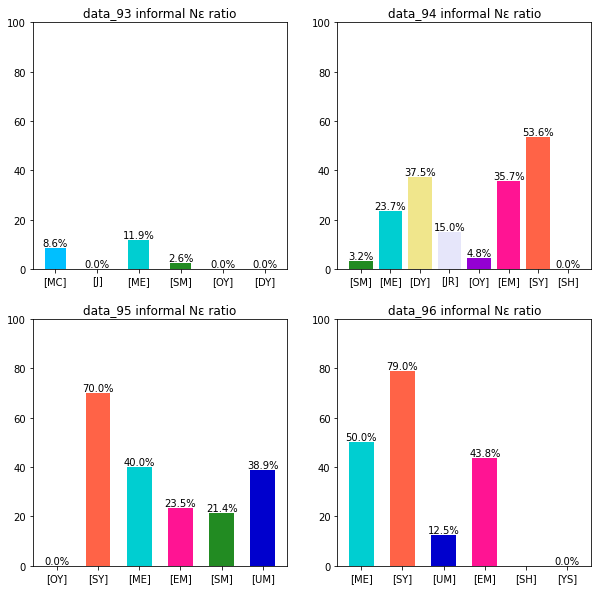

In [110]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))


bar93 = axs[0, 0].bar(x = data_93['speakers'], 
        height = data_93['informal [Ne] ratio'],
        width = 0.5,
        color = ['#00BFFF', '#F0FFF0','#00CED1', '#228B22', 
                    '#9400D3', '#FF6347' ])
for rect in bar93:
    height = rect.get_height()
    axs[0, 0].text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height + '%', 
            ha = 'center', va = 'bottom', size = 10)
axs[0, 0].set_title('data_93 informal Nɛ ratio')
axs[0, 0].set_ylim(0, 100)

bar94 = axs[0, 1].bar(x = data_94['speakers'], 
        height = data_94['informal [Ne] ratio'],
        width = 0.8,
        color = ['#228B22', '#00CED1','#F0E68C', '#E6E6FA', 
                    '#9400D3', '#FF1493', '#FF6347', '#FFB6C1' ])
for rect in bar94:
    height = rect.get_height()
    axs[0, 1].text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height + '%', 
            ha = 'center', va = 'bottom', size = 10)

axs[0, 1].set_title('data_94 informal Nɛ ratio')
axs[0, 1].set_ylim(0, 100)



bar95 = axs[1, 0].bar(x = data_95['speakers'], 
        height = data_95['informal [Ne] ratio'],
        width = 0.6,
        color = ['#9400D3', '#FF6347','#00CED1', '#FF1493', 
                    '#228B22', '#0000CD' ])
for rect in bar95:
    height = rect.get_height()
    axs[1, 0].text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height + '%', 
            ha = 'center', va = 'bottom', size = 10)

axs[1, 0].set_title('data_95 informal Nɛ ratio')
axs[1, 0].set_ylim(0, 100)

bar96 = axs[1, 1].bar(x = data_96['speakers'], 
        height = data_96['informal [Ne] ratio'],
        width = 0.6,
        color = ['#00CED1', '#FF6347','#0000CD', '#FF1493', 
                    '#FFB6C1', '#DCDCDC' ])
for rect in bar96:
    height = rect.get_height()
    axs[1, 1].text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height + '%', 
            ha = 'center', va = 'bottom', size = 10)

axs[1, 1].set_title('data_96 informal Nɛ ratio')
axs[1, 1].set_ylim(0, 100)

- **Spearman Correlation attempt**

In [183]:
pd.concat([data_93, data_94, data_95, data_96], ignore_index = True, 
         keys = 'speakers')

C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_42212/1485232927.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([data_93, data_94, data_95, data_96], ignore_index = True,


,speakers,counts,[Ne] counts,[Ne] types,[Ne] type counts,informal [Ne] counts,informal [Ne] ratio
0,[MC],3583,116,"[네네, 넵, 넵넵, 넵넵, 네네, 넵, 넵~, 넵넵, 네, 넵, 넵, 넵, 네, 넵, 넵, 넵~, 넵, 네, 넵넵, 넵, 넵, 네네, 네, 넵!, 네엡~!, 넵, 넵, 네~~, 네, 네, 넵, 넵넵, 네엡, 네네, 네네, 넵넵, 네네, 네네, 넵넵!, 네네, 네, 넵넵, 넵넵, 네~~, 네네!, 네네, 네네~, 네네, 넵ㄴ베, 네네, 네네, 네네, 네네, 네, 네네, 넵, 네엡, 넵, 넵!, 넵, 넵넵!, 넵넵!, 네네, 네네, 넵, 네네, 네네, 네네, 네, 네네, 네네, 넵!, 네네!, 넵!, 네네, 네네, 넵, 넵, 네, 넵, 넵, 넵~~, 넵, 넵, 넵넵, 네네, 네, 네네, 네, 넵, 네네, 넵~!, 넵넵, 넵!, 네네, 네넹, 넵!, 네, 넵, 네네, ...]",18,10,8.62
1,[J],147,18,"[넵!, 넵!, 넵넵!, 넵, 넵!, 넵!, 넵, 넵!, 넵!, 넵, 넵넵!, 네넵, 넵!, 넵!, 넵~, 넵, 넵, 넵]",5,0,0.00
2,[ME],959,59,"[넵!!, 네네!, 넵!, 네!!!, 넵, 넵넵, 네네!!!, 넵, 넵, 네넵, 네네!!, 네넵, 넵넵, 넵넵!, 네네!, 넵, 네, 넵, 네, 넵, 네, 네, 네넵, 네엡, 넵, 넵, 넵넵, 네네, 넵, 네엡...ㅜㅠㅠㅠ, 넵넵, 넵, 네네, 네넵, 네네, 넵, 넵!~~, 넵넵!~~, 넵!~~~, 넵!, 넵, 넵~~, 넵~~, 넵, 넵, 넵, 네네, 네넵~, 네!!, 넵넵, 넵, 넵~, 넵, 넵!~, 넵~, 넵, 넵, 넵!~, 넵]",22,7,11.86
3,[SM],2244,78,"[네네, 넵넵~, 네.감사해용!, 네, 네네, 네, 네네ㅎㅎ, 네네, 네~~, 넵ㅎㅎ, 네, 네네, 네네, 네네, 네, 네, 네네, 네넹, 네네~, 네네, 네네, 넵넵~, 네네, 네네, 네, 네네, 네네, 네네, 네~, 네네, 네.., 네네, 네, 네네, 네~~, 네, 네, 네, 네네, 네네, 네네, 네, 네, 넵~!, 넵넵, 넵, 넵넵, 넵, 넵넵, 넵넵ㅎㅎ, 네네, 네네, 네네, 네네, 넵넵, 네네, 넵ㅎㅎ, 네네, 네, 네네ㅎㅎ, 네네ㅎㅎ, 네, 네네, 네네~, 넵, 네네, 네~, 네네, 네네ㅋㅋㅋㅋ, 네네, 넵넵, 넵, 넵넵, 네네, 네, 네, 네, 네네]",16,2,2.56
4,[OY],1939,43,"[네...?, 네^____^, 네, 네, 네네, 네!, 네, 네가, 네, 네...ㅎ, 네, 네, 네!, 네~, 네, 네!, 네, 네, 네, 네, 네, 네, 네!, 네, 네네, 네, 네, 네!, 네, 네, 네, 네, 네?, 네, 네네, 네, 네, 네, 네, 네, 네, 네, 네]",9,0,0.00
5,[DY],504,42,"[네네, 네넵, 네, 네넵, 네, 넵, 네넵, 넵, 네넵, 넵, 넵넵, 넵, 넵, 넵넵, 넵넵, 넵, 넵, 네넵, 네넵, 넵, 네넵, 넵, 네넵, 네, 네네, 네넵, 네네, 넵, 네넵, 넵넵, 네넵, 네넵, 넵넵, 넵, 넵, 네넵, 넵, 네, 넵넵, 넵, 넵, 넵]",5,0,0.00
6,[SM],3419,94,"[넵~, 넵넵ㅠㅠ, 넵넵!, 네네, 넵넵ㅎㅎ, 넵~, 네, 네네, 넵~, 네네, 넵넵, 네, 네네, 넵, 네네, 넵, 넵, 네, 네, 네네, 넵넵, 네네, 네, 넵넵ㅎㅋ, 넵, 네, 네, 네~, 네네, 네~, 네네, 네~, 네네!, 네네, 네네, 네네~!, 네, 네네, 네, 넵, 네, 넵, 넵넵~ㅠ, 네네, 네, 네, 넵, 넵넵~!ㅠ, 넵, 네네, 네, 네네, 네네~, 넵넵, 네, 네네, 넵, 네네, 네네, 넵, 넵넵~!, 네네~~!!, 네네!, 넵~ㅎㅎ, 네네~~~, 네네ㅎㅎ, 네, 네, 네, 네네, 네네, 네네, 네.., 네네~~~, 네, 네네, 네..., 네네, 네, 네네, 네네ㅋㅋㅋㅋ, 네네, 네네, 네, 넵, 네네, 네, 네네, 네.., 네네, 네네ㅠㅠ, 넵넵~, 네, 네]",25,3,3.19
7,[ME],1065,38,"[넵, 넵!~, 넵넵, 네네!, 네엡, 넵넵, 네네!, 넵넵, 넵, 넵!~~, 넵, 넵, 네네, 네엡, 넵, 네엡, 네, 네엡, 네엡, 네...저도, 넵, 넵, 넵넵, 넵, 네엡, 넵, 넵, 네네, 네, 네넵, 네엡, 넵넵, 넵~, 넵넵!!, 네넹, 넵, 네네, 네]",13,9,23.68
8,[DY],261,8,"[네네, 넵, 네넹, 넵, 네, 넵, 네엡, 네넹]",5,3,37.50
9,[JR],1396,20,"[네네!, 네넵, 넵, 넵, 넵, 넵,,,, 네넹, 넵!!, 네…., 네네!, 네네!, 네네, 네네!!!!, 네네!, 네네!!!!!!!!!!!, 네네, 네네!, 네네!]",10,3,15.00


In [203]:
data_9394 = pd.merge(data_93, data_94, how = 'outer', on = 'speakers', 
        suffixes= ('_93', '_94'), )
data_939495 = pd.merge(data_9394, data_95, how = 'outer', on = 'speakers', 
                      suffixes = ('', '_95'))
data_93949596 = pd.merge(data_939495, data_96, how = 'outer', on = 'speakers', 
                      suffixes = ('', '_96'))

In [204]:
data_93949596.columns

Index(['speakers', 'counts_93', '[Ne] counts_93', '[Ne] types_93',
       '[Ne] type counts_93', 'informal [Ne] counts_93',
       'informal [Ne] ratio_93', 'counts_94', '[Ne] counts_94',
       '[Ne] types_94', '[Ne] type counts_94', 'informal [Ne] counts_94',
       'informal [Ne] ratio_94', 'counts', '[Ne] counts', '[Ne] types',
       '[Ne] type counts', 'informal [Ne] counts', 'informal [Ne] ratio',
       'counts_96', '[Ne] counts_96', '[Ne] types_96', '[Ne] type counts_96',
       'informal [Ne] counts_96', 'informal [Ne] ratio_96'],
      dtype='object')

In [205]:
data_93949596.columns

Index(['speakers', 'counts_93', '[Ne] counts_93', '[Ne] types_93',
       '[Ne] type counts_93', 'informal [Ne] counts_93',
       'informal [Ne] ratio_93', 'counts_94', '[Ne] counts_94',
       '[Ne] types_94', '[Ne] type counts_94', 'informal [Ne] counts_94',
       'informal [Ne] ratio_94', 'counts', '[Ne] counts', '[Ne] types',
       '[Ne] type counts', 'informal [Ne] counts', 'informal [Ne] ratio',
       'counts_96', '[Ne] counts_96', '[Ne] types_96', '[Ne] type counts_96',
       'informal [Ne] counts_96', 'informal [Ne] ratio_96'],
      dtype='object')

In [207]:
data_93949596 = data_93949596[['speakers', 'informal [Ne] ratio_93', 
              'informal [Ne] ratio_94', 
              'informal [Ne] ratio', 
              'informal [Ne] ratio_96']]

In [238]:
data_93949596['speakers'] = pd.Series(map(lambda x: x.strip('[]'), data_93949596['speakers']))

In [239]:
data_93949596

,speakers,informal [Ne] ratio_93,informal [Ne] ratio_94,informal [Ne] ratio,informal [Ne] ratio_96
0,MC,8.62,NaN,NaN,NaN
1,J,0.00,NaN,NaN,NaN
2,ME,11.86,23.68,40.00,50.00
3,SM,2.56,3.19,21.43,NaN
4,OY,0.00,4.76,0.00,NaN
5,DY,0.00,37.50,NaN,NaN
6,JR,NaN,15.00,NaN,NaN
7,EM,NaN,35.71,23.53,43.75
8,SY,NaN,53.57,70.00,78.95
9,SH,NaN,0.00,NaN,NaN


In [283]:
speakers = pd.merge(counts[['speakers', 'active member', 'sum', 'rank']], data_93949596, how = 'outer', 
          on = 'speakers')

In [284]:
speakers

,speakers,active member,sum,rank,informal [Ne] ratio_93,informal [Ne] ratio_94,informal [Ne] ratio,informal [Ne] ratio_96
0,HJ,0,12.0,7.0,NaN,NaN,NaN,NaN
1,MC,0,5.0,11.0,8.62,NaN,NaN,NaN
2,J,0,4.0,12.0,0.00,NaN,NaN,NaN
3,SM,1,21.0,1.0,2.56,3.19,21.43,NaN
4,ME,1,17.0,3.0,11.86,23.68,40.00,50.00
5,JR,1,9.0,9.0,NaN,15.00,NaN,NaN
6,SH,1,9.0,9.0,NaN,0.00,NaN,NaN
7,UM,1,17.0,3.0,NaN,NaN,38.89,12.50
8,OY,1,10.0,8.0,0.00,4.76,0.00,NaN
9,EM,1,17.0,3.0,NaN,35.71,23.53,43.75


In [285]:
speakers = speakers.fillna(0)

In [286]:
speakers['mean'] = (speakers['informal [Ne] ratio_93'] 
                    + speakers['informal [Ne] ratio_94']
                    + speakers['informal [Ne] ratio']
                    + speakers['informal [Ne] ratio_96']) / 4

- spearman correlation between the sum of network counts and the mean of informal 네 ratio
- spearman correlation between the rank of network counts and the mean of informal 네 ratio

In [300]:
import scipy.stats as stats

rho_sum, p_sum = stats.spearmanr(speakers['sum'], speakers['mean'])
rho_rank, p_rank = stats.spearmanr(-speakers['rank'], speakers['mean'])

In [301]:
rho_sum, rho_rank

(0.7896407346445914, 0.46144192131096007)

In [302]:
p_sum, p_rank

(0.001324282814693007, 0.11246097482242307)

In [304]:
pd.DataFrame(np.array([rho_sum, rho_rank, p_sum, p_rank]).reshape((2, 2)), columns = ['sum', 'rank'], index = ['coef', 'p-value'])

,sum,rank
coef,0.789641,0.461442
p-value,0.001324,0.112461


In [307]:
speakers

,speakers,active member,sum,rank,informal [Ne] ratio_93,informal [Ne] ratio_94,informal [Ne] ratio,informal [Ne] ratio_96,mean,original
0,HJ,0,12.0,7.0,0.00,0.00,0.00,0.00,0.0000,1
1,MC,0,5.0,11.0,8.62,0.00,0.00,0.00,2.1550,1
2,J,0,4.0,12.0,0.00,0.00,0.00,0.00,0.0000,1
3,SM,1,21.0,1.0,2.56,3.19,21.43,0.00,6.7950,1
4,ME,1,17.0,3.0,11.86,23.68,40.00,50.00,31.3850,1
5,JR,1,9.0,9.0,0.00,15.00,0.00,0.00,3.7500,0
6,SH,1,9.0,9.0,0.00,0.00,0.00,0.00,0.0000,0
7,UM,1,17.0,3.0,0.00,0.00,38.89,12.50,12.8475,0
8,OY,1,10.0,8.0,0.00,4.76,0.00,0.00,1.1900,1
9,EM,1,17.0,3.0,0.00,35.71,23.53,43.75,25.7475,0


In [291]:
speakers['original'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]

- spearman correlation using data only of original members

In [292]:
rho_original, p_original = stats.spearmanr(speakers[speakers['original'] == 1]['sum'], speakers[speakers['original'] == 1]['mean'])

In [293]:
rho_original, p_original

(0.702731220902536, 0.07823745383207154)

In [295]:
rho_original_rank, p_original_rank

(0.702731220902536, 0.07823745383207154)

In [306]:
pd.DataFrame(np.array([rho_original, rho_original_rank, p_original, p_original_rank]).reshape((2, 2)), columns = ['org_sum', 'org_rank'], index = ['coef', 'p-value'])

,org_sum,org_rank
coef,0.702731,0.702731
p-value,0.078237,0.078237


In [296]:
speakers.groupby(['original'])[['sum', 'rank', 'mean']].apply(lambda x: x)

sum  rank     mean
original                        
0        5    9.0   9.0   3.7500
         6    9.0   9.0   0.0000
         7   17.0   3.0  12.8475
         9   17.0   3.0  25.7475
         10  19.0   2.0  50.6300
         12   0.0   0.0   0.0000
1        0   12.0   7.0   0.0000
         1    5.0  11.0   2.1550
         2    4.0  12.0   0.0000
         3   21.0   1.0   6.7950
         4   17.0   3.0  31.3850
         8   10.0   8.0   1.1900
         11  14.0   6.0   9.3750